#**1.Analisis Karakteristik Cluster dari Model KMeans**

Tahap pertama,Anda harus mencari dan menggunakan dataset **tanpa label**dengan ketentuan sebagai berikut:

1.**Sumber Dataset:**
    **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

#2.**Import Liblary**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

#3. **Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df=pd.read_csv('osn.csv')
df

,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun
0,0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,NaN,2016
1,1,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,NaN,2021
2,2,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,NaN,2022
3,3,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,NaN,2022
4,4,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,19322,Fitri Julia Simamora,P,SMPN 4 Doloksanggul,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,NaN,2024
19323,19323,Jonathan Kevin Aruan,L,SMPN 6 Sentajo,Riau,Kab. Kuantan Singingi,IPS,SMP,SMP,NaN,Partisipan,NaN,2016
19324,19324,Mely Winda Sihite,P,SMPN 4 Doloksanggul,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,NaN,2024
19325,19325,Jelita Fazira,P,SMPN 4 Pantai Labu Satu Atap,Sumatera Utara,Kab. Deli Serdang,IPS,SMP,SMP,NaN,Partisipan,NaN,2021


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **1. Memahami Struktur Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       19327 non-null  int64  
 1   Nama Peserta     19327 non-null  object 
 2   Gender           19327 non-null  object 
 3   Sekolah          19327 non-null  object 
 4   Provinsi         19327 non-null  object 
 5   Kab/Kota         19327 non-null  object 
 6   Bidang           19327 non-null  object 
 7   Jenjang Lomba    19327 non-null  object 
 8   Jenjang Sekolah  19327 non-null  object 
 9   Kelas            14852 non-null  float64
 10  Medali           19327 non-null  object 
 11  Prize Tambahan   221 non-null    object 
 12  Tahun            19327 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [ ]:
df.describe(include="all")

,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun
count,19327.000000,19327,19327,19327,19327,19327,19327,19327,19327,14852.000000,19327,221,19327.000000
unique,NaN,16057,2,4166,39,488,11,2,2,NaN,5,110,NaN
top,NaN,Galih Rineksa,L,MAN Insan Cendekia Gorontalo,Jawa Tengah,Kota Tangerang Selatan,Matematika,SMA,SMA,NaN,Partisipan,Best Theory,NaN
freq,NaN,5,12497,201,1859,560,3500,12892,12501,NaN,13483,20,NaN
mean,9663.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.187719,NaN,NaN,2016.919180
std,5579.368662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.218686,NaN,NaN,4.570646
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,2009.000000
25%,4831.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,2013.000000
50%,9663.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,2017.000000
75%,14494.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,2021.000000


##**2.Menangani Data Yang Hilang**





In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Nama Peserta,0
Gender,0
Sekolah,0
Provinsi,0
Kab/Kota,0
Bidang,0
Jenjang Lomba,0
Jenjang Sekolah,0
Kelas,4475


In [ ]:
df["Kelas"].value_counts()

,count
Kelas,
11.0,8888
10.0,3038
8.0,1930
7.0,622
9.0,374


In [ ]:
df['Kelas'].fillna(df['Kelas'].median(), inplace=True)

<ipython-input-788-d933bb00973f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kelas'].fillna(df['Kelas'].median(), inplace=True)


In [ ]:
df

,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun
0,0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,NaN,2016
1,1,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,NaN,2021
2,2,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,NaN,2022
3,3,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,NaN,2022
4,4,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,19322,Fitri Julia Simamora,P,SMPN 4 Doloksanggul,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,NaN,2024
19323,19323,Jonathan Kevin Aruan,L,SMPN 6 Sentajo,Riau,Kab. Kuantan Singingi,IPS,SMP,SMP,11.0,Partisipan,NaN,2016
19324,19324,Mely Winda Sihite,P,SMPN 4 Doloksanggul,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,NaN,2024
19325,19325,Jelita Fazira,P,SMPN 4 Pantai Labu Satu Atap,Sumatera Utara,Kab. Deli Serdang,IPS,SMP,SMP,11.0,Partisipan,NaN,2021


##**3.Analisis Distribusi dan Korelasi**

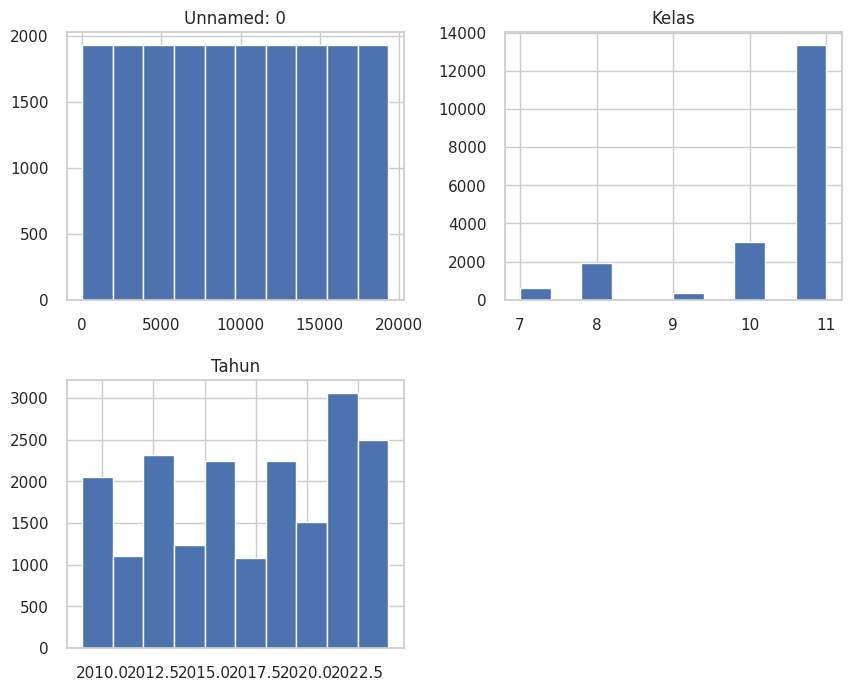

In [ ]:
df.hist(figsize=(10,8))
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

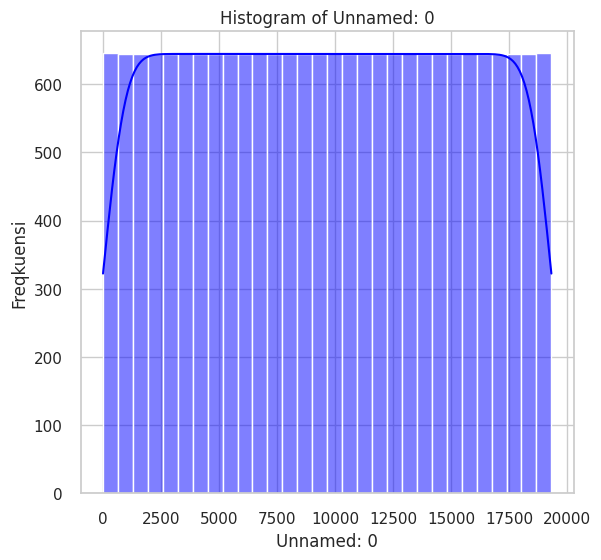

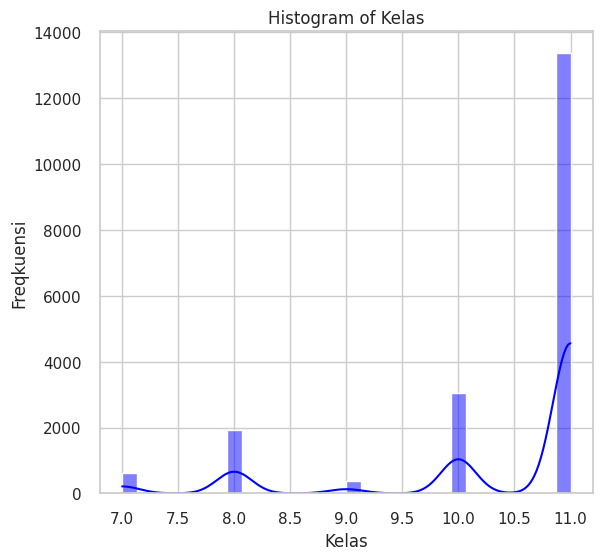

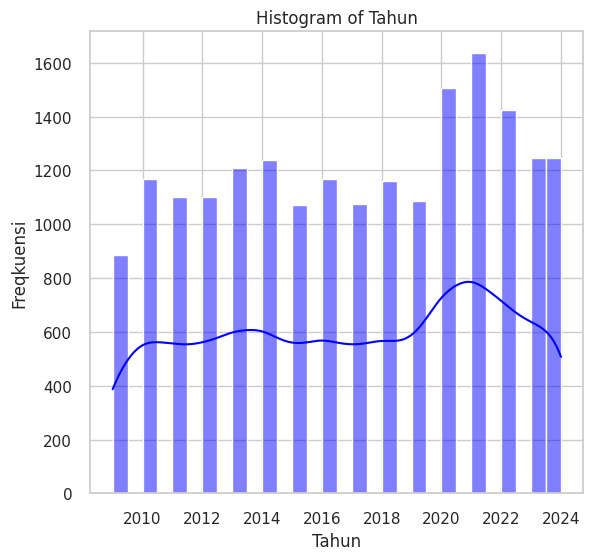

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True,bins=30,color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Freqkuensi')

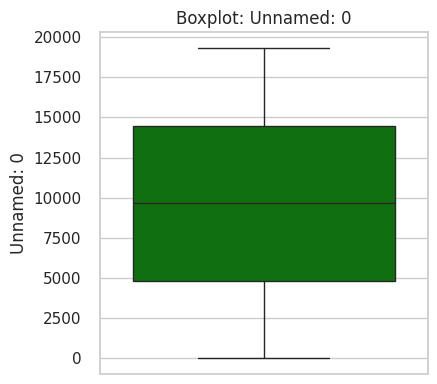

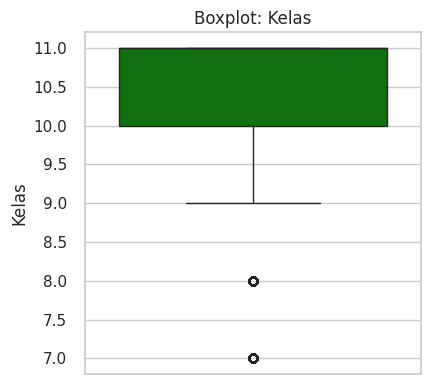

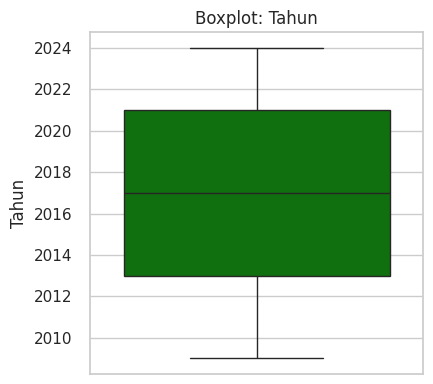

In [ ]:
 for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column], color='green')
    plt.title(f"Boxplot: {column}")
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

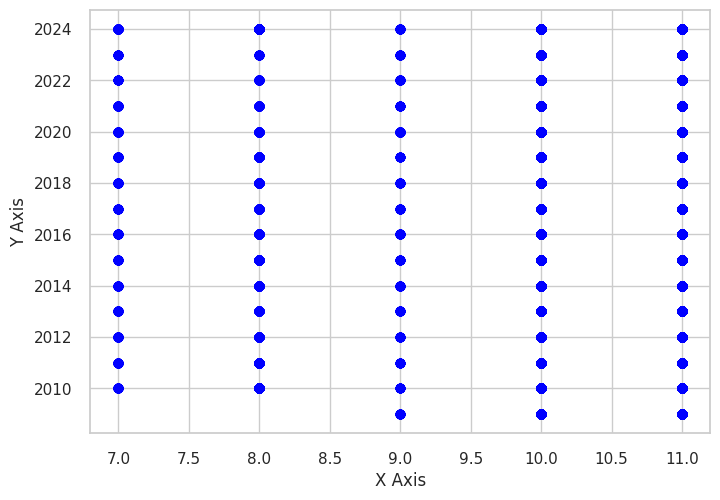

In [ ]:
plt.scatter(x=df["Kelas"], y=df["Tahun"], color='blue', marker='o')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

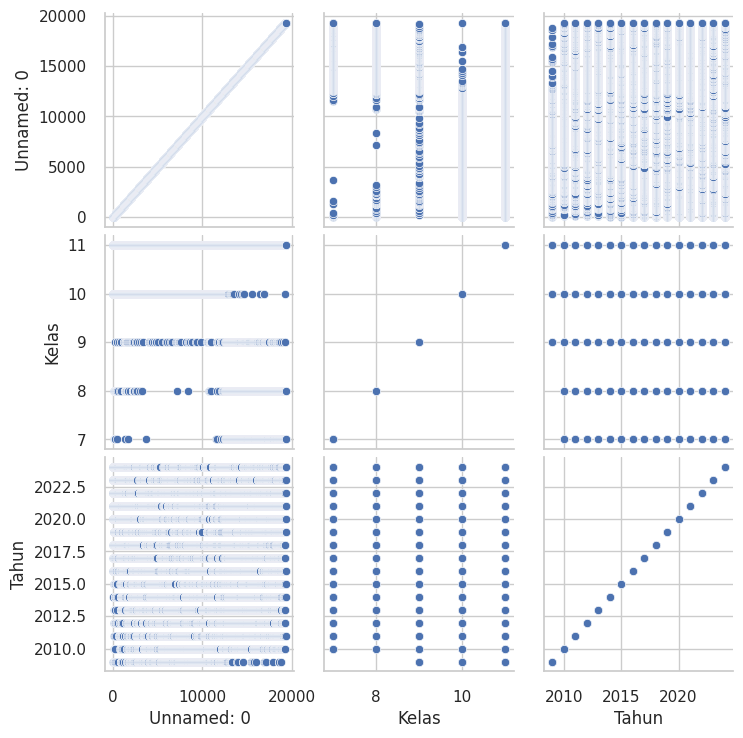

In [ ]:
sns.pairplot(df[numerical_columns], diag_kind=None)
plt.show()

##**4.Visualisasi Data**

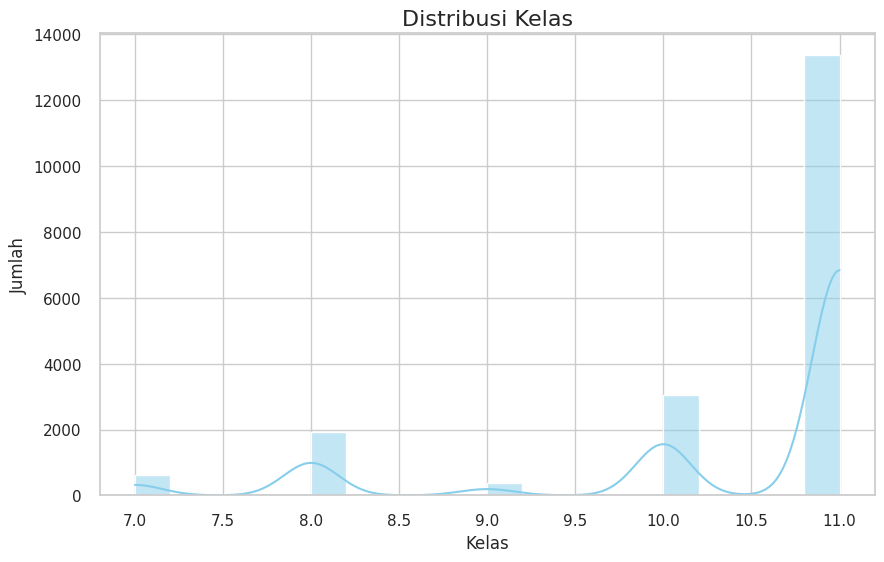

<ipython-input-796-1e097dd56ecd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medali_counts.index, y=medali_counts.values, palette='viridis')


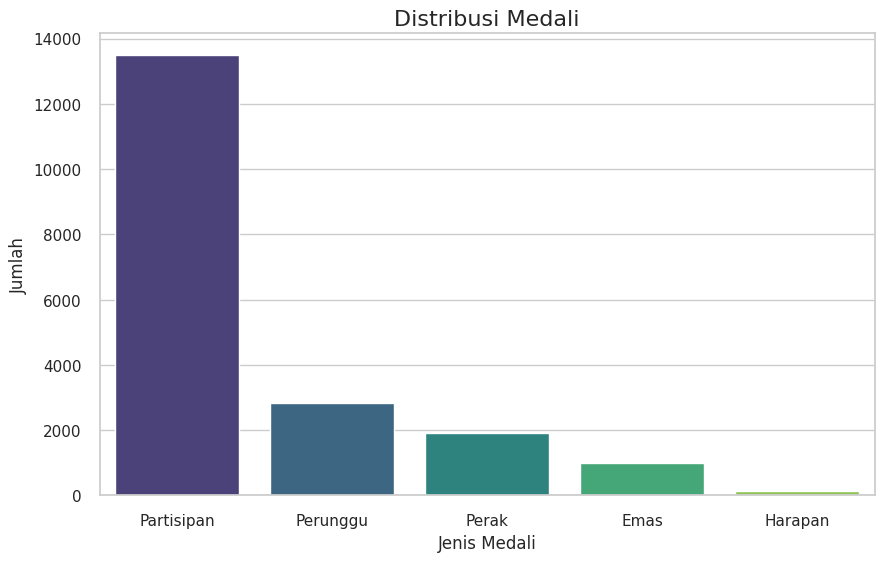

<ipython-input-796-1e097dd56ecd>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinsi.index, y=top_provinsi.values, palette='coolwarm')


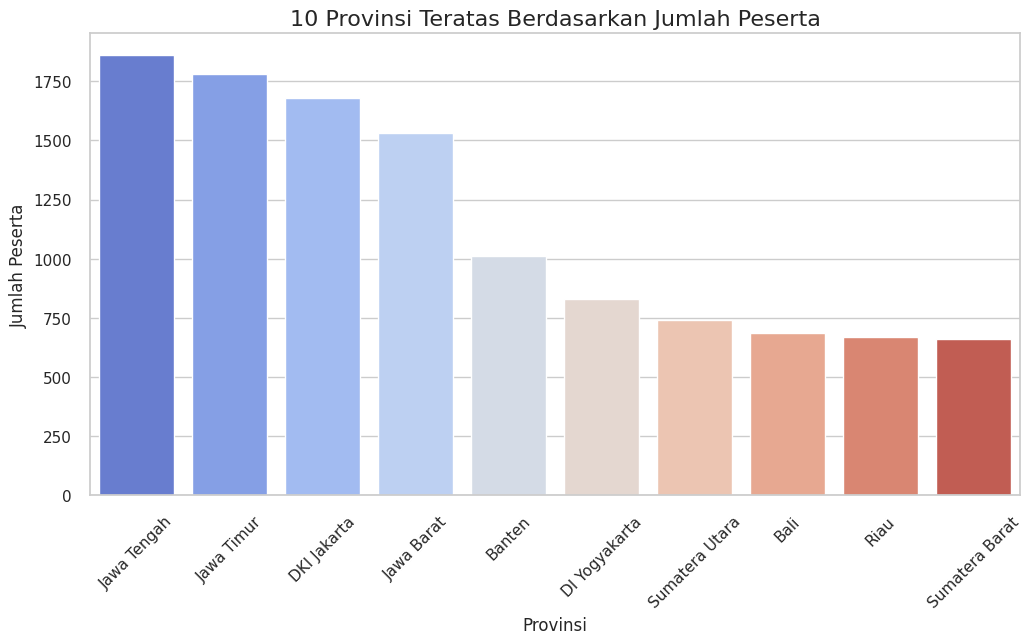

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Kelas'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Kelas', fontsize=16)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
medali_counts = df['Medali'].value_counts()
sns.barplot(x=medali_counts.index, y=medali_counts.values, palette='viridis')
plt.title('Distribusi Medali', fontsize=16)
plt.xlabel('Jenis Medali', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()


plt.figure(figsize=(12, 6))
top_provinsi = df['Provinsi'].value_counts().head(10)
sns.barplot(x=top_provinsi.index, y=top_provinsi.values, palette='coolwarm')
plt.title('10 Provinsi Teratas Berdasarkan Jumlah Peserta', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Peserta', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
correlation_matrix = df[numerical_columns].corr()

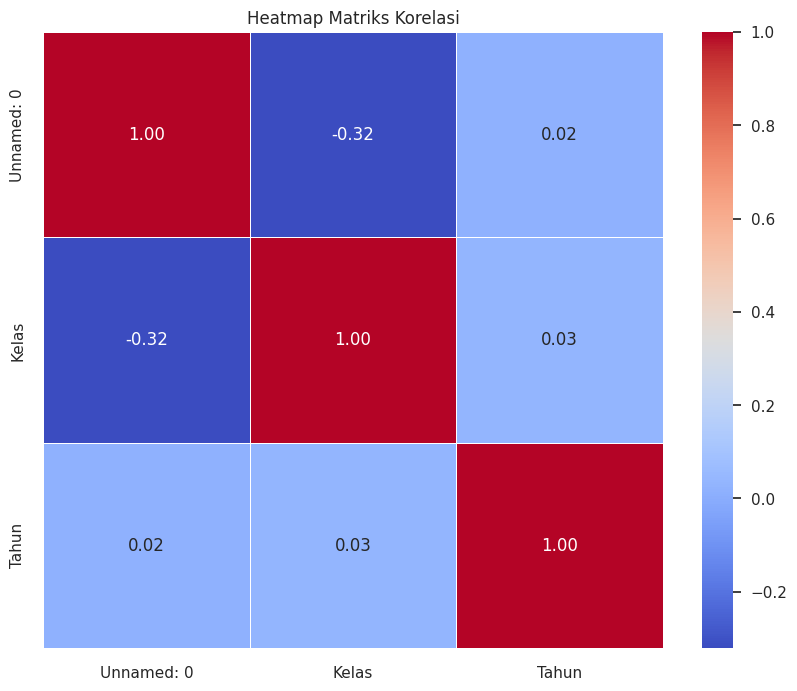

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Matriks Korelasi")
plt.show()

#**5.Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

##**1.Menghapus atau Menangani Data Kosong**

In [ ]:
df_cleaned = df.drop(columns=["Unnamed: 0","Nama Peserta","Sekolah","Prize Tambahan"])


In [ ]:
df_cleaned

,Gender,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Tahun
0,L,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,2016
1,L,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,2021
2,L,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,2022
3,L,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,2022
4,L,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,2022
...,...,...,...,...,...,...,...,...,...
19322,P,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,2024
19323,L,Riau,Kab. Kuantan Singingi,IPS,SMP,SMP,11.0,Partisipan,2016
19324,P,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,2024
19325,P,Sumatera Utara,Kab. Deli Serdang,IPS,SMP,SMP,11.0,Partisipan,2021


##**2.Menghapus Duplikat**
Tidak ada data yang terduplikat

##**3.Normalisasi atau Standarisasi Fitur**

Dikarenakan saya ingin menormalisasikan data kategorikal,jadi proses encoding saya dahulukan

In [ ]:
kolom= ["Gender","Provinsi","Kab/Kota","Bidang","Jenjang Lomba","Jenjang Sekolah","Medali"]
label_encoder = {col: LabelEncoder() for col in kolom}
for col in kolom:
    df_cleaned[col] = label_encoder[col].fit_transform(df_cleaned[col])
df_cleaned

,Gender,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Tahun
0,0,11,468,1,0,0,11.0,2,2016
1,0,0,388,2,0,0,11.0,2,2021
2,0,0,388,2,0,0,11.0,0,2022
3,0,0,388,3,0,0,11.0,2,2022
4,0,0,388,9,0,0,11.0,2,2022
...,...,...,...,...,...,...,...,...,...
19322,1,38,119,10,1,1,7.0,2,2024
19323,0,30,168,6,1,1,11.0,2,2016
19324,1,38,119,10,1,1,7.0,2,2024
19325,1,38,91,6,1,1,11.0,2,2021


In [ ]:
df_cleaned.dtypes

,0
Gender,int64
Provinsi,int64
Kab/Kota,int64
Bidang,int64
Jenjang Lomba,int64
Jenjang Sekolah,int64
Kelas,float64
Medali,int64
Tahun,int64


In [ ]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df_cleaned)
normalized_features

array([[-0.73927746, -0.37615497,  0.9489835 , ...,  0.55638748,
        -0.31167935, -0.20111033],
       [-0.73927746, -1.33508988,  0.40068927, ...,  0.55638748,
        -0.31167935,  0.89285515],
       [-0.73927746, -1.33508988,  0.40068927, ...,  0.55638748,
        -2.52795113,  1.11164825],
       ...,
       [ 1.3526721 ,  1.97759436, -1.4429501 , ..., -3.00903058,
        -0.31167935,  1.54923444],
       [ 1.3526721 ,  1.97759436, -1.63485308, ...,  0.55638748,
        -0.31167935,  0.89285515],
       [-0.73927746,  1.97759436, -1.4429501 , ...,  0.55638748,
        -0.31167935,  0.67406206]])

##**4. Deteksi dan Penanganan Outlier**

In [ ]:

# Menghitung Q1, Q3, dan IQR untuk semua kolom dalam df_selected
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier (True jika ada outlier, False jika tidak)
outlier_flags = (df_cleaned < lower_bound) | (df_cleaned > upper_bound)

# Menambahkan kolom "Outlier" yang menandai apakah ada outlier di baris tersebut
df_cleaned["Outlier"] = outlier_flags.any(axis=1)

In [ ]:
for col in df_cleaned.columns:
    if col != "Outlier":  # Hindari mengubah kolom indikator outlier
        median = df_cleaned[col].mean()  # Bisa juga pakai mean()
        df_cleaned[col] = np.where(df_cleaned["Outlier"], median, df_cleaned[col])

df_cleaned = df_cleaned.drop(columns=["Outlier"])  # Hapus kolom penanda Outlier

#**6.Pembangunan Model Clustering**

##**a.Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah rekomendasi tahapannya.

1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
X= df_cleaned[["Provinsi","Tahun","Bidang","Kelas","Gender","Kab/Kota"]]
kmeans = KMeans( random_state=42)

kmeans.fit(X)

KMeans(random_state=42)

##**b.Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah rekomendasi tahapannya.

1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

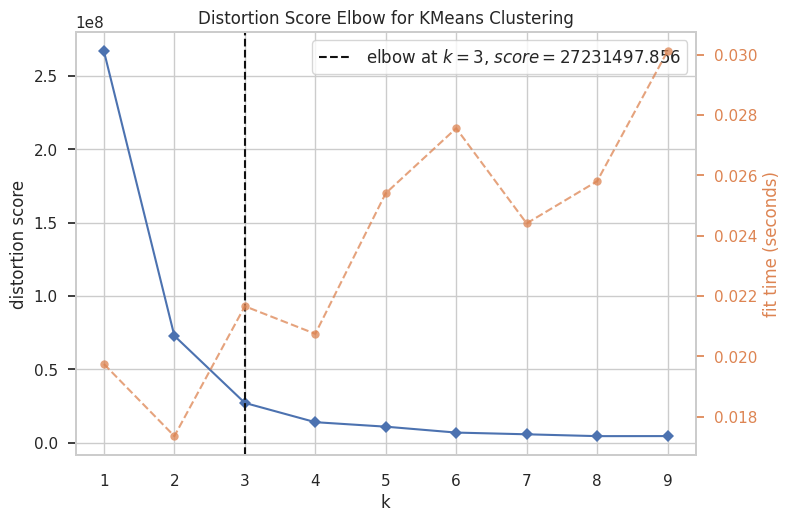

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)

visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

df_cleaned['Cluster'] = kmeans.labels_

In [ ]:
silhouette = silhouette_score(X,kmeans.labels_)
silhouette


0.7088702508875148

##**c.Feature Selection(optional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Fetature Selection dengan PCA

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [ ]:
kmeans_pca = KMeans(n_clusters=3, random_state=42,n_init=10)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
silhoutte_feature = silhouette_score(X_pca, kmeans_pca.labels_)
silhoutte_feature

0.7106945256229765

In [ ]:
print(f"\nNilai sebelum di feature selection: {silhouette:.4f}")


Nilai sebelum di feature selection: 0.7089


In [ ]:
print(f"\nNilai setelah feature selection: {silhoutte_feature:.4f}")


Nilai setelah feature selection: 0.7107


In [ ]:
perbandingan = silhoutte_feature - silhouette
print(f"\nPerbandingan nilai silhouette setelah feature selection: {perbandingan:.4f}")



Perbandingan nilai silhouette setelah feature selection: 0.0018


##**d.Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah rekomendasi tahapannya.

Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

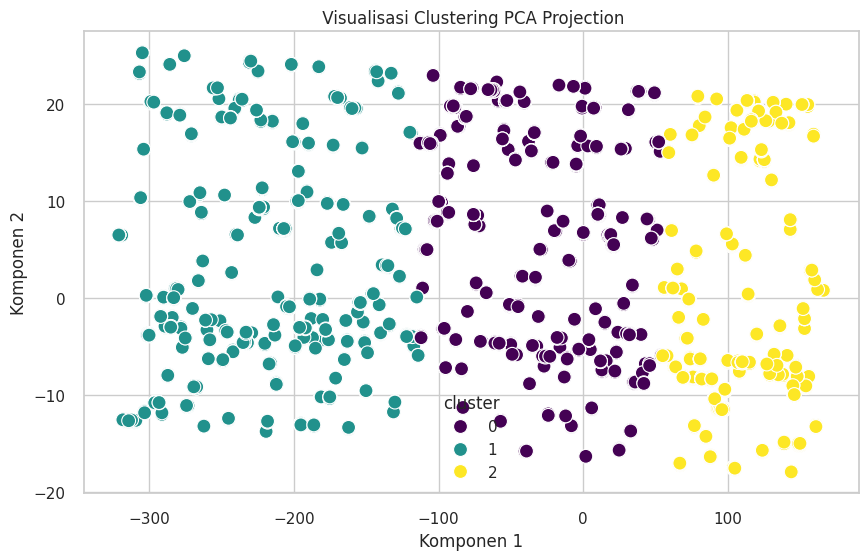

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned['Cluster'], palette='viridis', s=100)
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.title(" Visualisasi Clustering PCA Projection")
plt.legend(title="cluster")
plt.show()

##e.**Analisis Hasil Interpretasi Target**

###Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_cleaned['Cluster'] = kmeans_pca.labels_

In [ ]:
df_cleaned.dtypes

,0
Gender,float64
Provinsi,float64
Kab/Kota,float64
Bidang,float64
Jenjang Lomba,float64
Jenjang Sekolah,float64
Kelas,float64
Medali,float64
Tahun,float64
Cluster,int32


In [ ]:
df_cleaned['Gender'] = label_encoder['Gender'].inverse_transform(df_cleaned['Gender'].round().astype(int))
df_cleaned['Kab/Kota'] = label_encoder['Kab/Kota'].inverse_transform(df_cleaned['Kab/Kota'].round().astype(int))
df_cleaned['Bidang'] = label_encoder['Bidang'].inverse_transform(df_cleaned['Bidang'].round().astype(int))
df_cleaned['Jenjang Lomba'] = label_encoder['Jenjang Lomba'].inverse_transform(df_cleaned['Jenjang Lomba'].round().astype(int))
df_cleaned['Jenjang Sekolah'] = label_encoder['Jenjang Sekolah'].inverse_transform(df_cleaned['Jenjang Sekolah'].round().astype(int))
df_cleaned['Medali'] = label_encoder['Medali'].inverse_transform(df_cleaned['Medali'].round().astype(int))


In [ ]:
df_cleaned['Provinsi'] = label_encoder['Provinsi'].inverse_transform(df_cleaned['Provinsi'].round().astype(int))

In [ ]:
df_cleaned.dtypes

,0
Gender,object
Provinsi,object
Kab/Kota,object
Bidang,object
Jenjang Lomba,object
Jenjang Sekolah,object
Kelas,float64
Medali,object
Tahun,int64
Cluster,int32


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
idx_tahun = df_cleaned.columns.get_loc('Tahun')
data_scaled_tahun = normalized_features[:, idx_tahun]
mean_tahun = scaler.mean_[idx_tahun]
scale_tahun = scaler.scale_[idx_tahun]
data_unscaled_tahun = data_scaled_tahun * scale_tahun + mean_tahun
df_cleaned['Tahun'] = np.round(data_unscaled_tahun).astype(int)

In [ ]:
idx_kelas = df_cleaned.columns.get_loc('Kelas')
data_scaled_kelas = normalized_features[:, idx_kelas]
mean_kelas = scaler.mean_[idx_kelas]
scale_kelas = scaler.scale_[idx_kelas]
data_unscaled_kelas = data_scaled_kelas * scale_kelas + mean_kelas
df_cleaned['Kelas'] = np.round(data_unscaled_kelas).astype(float)

In [ ]:
df_cleaned

,Gender,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Tahun,Cluster
0,L,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,2016,2
1,L,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,2021,2
2,L,Kalimantan Timur,Kab. Soppeng,IPA,SMA,SMA,11.0,Partisipan,2022,0
3,L,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,2022,2
4,L,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,2022,2
...,...,...,...,...,...,...,...,...,...,...
19322,L,Kalimantan Timur,Kab. Soppeng,IPA,SMA,SMA,7.0,Partisipan,2024,0
19323,L,Riau,Kab. Kuantan Singingi,IPS,SMP,SMP,11.0,Partisipan,2016,1
19324,L,Kalimantan Timur,Kab. Soppeng,IPA,SMA,SMA,7.0,Partisipan,2024,0
19325,P,Sumatera Utara,Kab. Deli Serdang,IPS,SMP,SMP,11.0,Partisipan,2021,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### Hasil interpretasi
### Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Tahun ke ikut sertaan:**  Tahun 2021
- **Rata-rata Bidang keikutsertaan (Geografi-Ipa):** IPA  
- **Analisis:** Cluster ini mencakup provinsi yang belum terlalu maju dan masih perlu dukungan/perhatian lebih untuk masalah pendidikan,dan kemudian untuk cluster 0 ini bidang yang di ikuti mencakup tentang perhitungan alam seperti ipa dan matematika.

## Cluster 1:
- **Rata-rata Tahun ke ikut sertaan:** 2020
- **Rata-rata Bidang keikutsertaan (Geografi-Ipa):** IPS
- **Analisis:** Cluster ini menunjukkan provinsi menengah tentang masalah pendidikan,dan bidang yang di ikuti mencakup tentang campuran antara hafalan dan perhitungan dimana ips dan matematika mendominasi
## Cluster 2:
- **Rata-rata Tahun ke ikut sertaan:** 2022
- **Rata-rata Bidang keikutsertaan (Geografi-Ipa):** Matematika  
- **Analisis:** Cluster ini terdiri dari provinsi urban/maju seperti DKI Jakarta,Bali,Banten dan Sumbar,kemudian bidang yang di ikuti full tentang perhitungan yaitu matematika dan fisika

# **7. Download csv**

In [ ]:
df_cleaned.to_csv("df_cleaned.csv", index=False)